In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw""
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1662


ERROR: LoadError: 

MethodError: no method matching get_attribute(::

MakieCore.Lines{Tuple{Vector{GeometryBasics.Point{2, Float32}}}}, ::Symbol, ::ColorTypes.RGBA{Float32})


Closest candidates are:
  get_attribute(::Any, ::Any) at ~/.julia/packages/MakieCore/8YGMv/src/attributes.jl:241
Stacktrace:
  [1] numbers_to_colors(numbers::Vector{Float32}, primitive::MakieCore.Lines{Tuple{Vector{GeometryBasics.Point{2, Float32}}}})
    @ Makie ~/.julia/packages/Makie/Ppzqh/src/colorsampler.jl:152
  [2] draw_atomic(scene::Makie.Scene, screen::CairoMakie.CairoScreen{Cairo.CairoSurfaceBase{UInt32}}, primitive::Union{MakieCore.LineSegments, MakieCore.Lines})
    @ CairoMakie ~/.julia/packages/CairoMakie/keP4X/src/primitives.jl:34
  [3] draw_plot(scene::Makie.Scene, screen::CairoMakie.CairoScreen{Cairo.CairoSurfaceBase{UInt32}}, primitive::MakieCore.Lines{Tuple{Vector{GeometryBasics.Point{2, Float32}}}})
    @ CairoMakie ~/.julia/packages/CairoMakie/keP4X/src/infrastructure.jl:251
  [4] cairo_draw(screen::CairoMakie.CairoScreen{Cairo.CairoSurfaceBase{UInt32}}, scene::Makie.Scene)
    @ CairoMakie ~/.julia/packages/CairoMakie/keP4X/src/infrastructure.jl:192
  [5] backend

Vararg{String}; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base ./io.jl:384
  [8] open
    @ ./io.jl:381 [inlined]
  [9] #backend_display#6
    @ ~/.julia/packages/CairoMakie/keP4X/src/infrastructure.jl:315 [inlined]
 [10] backend_display
    @ ~/.julia/packages/CairoMakie/keP4X/src/infrastructure.jl:314 [inlined]
 [11] backend_display(s::Makie.Scene; kw::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Makie ~/.julia/packages/Makie/Ppzqh/src/display.jl:51
 [12] backend_display(s::Makie.Scene)
    @ Makie ~/.julia/packages/Makie/Ppzqh/src/display.jl:49
 [13] top-level scope
    @ ~/.julia/packages/CairoMakie/keP4X/src/precompiles.jl:4
 [14] include(mod::Module, _path::String)
    @ Base ./Base.jl:419
 [15] include
    @ ~/.julia/packages/CairoMakie/keP4X/src/CairoMakie.jl:1 [inlined]
 [16] macro expansion
    @ ~/.julia/packages/CairoMakie/keP4X/src/precompiles.jl:15 [inlined]
 [17] macro expansion
    @ ~/.julia/packages/Makie/Ppzq

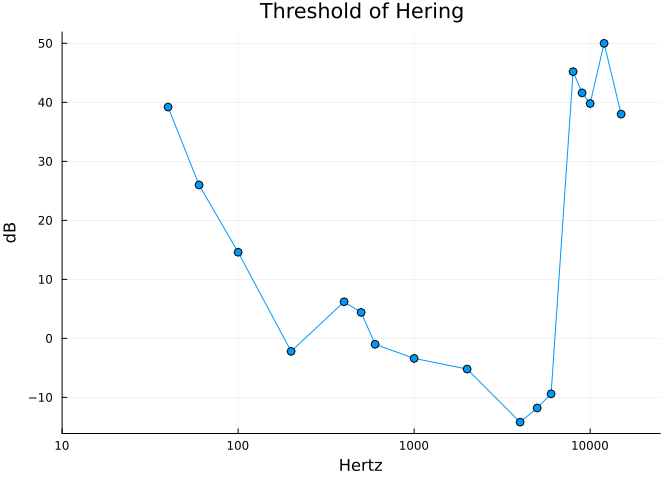

In [2]:
#| output: true
using DelimitedFiles
data = readdlm("minha_audicao.csv", ','; skipstart=1);

using Plots
xdata = data[:, 1]
ydata = data[:, 8]

plot(xdata, ydata; label="", markershape=:o, xscale=:log10, xlims=(10, 25_000))
plot!(; xticks=([10, 100, 1000, 10000], ["10", "100", "1000", "10000"]))
plot!(; xlabel="Hertz", ylabel="dB", title="Threshold of Hering")